In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path_to_data = os.path.join('c:\\', 'openclassrooms', 'projet 8','house-prices-advanced-regression-techniques')
data_fname = 'data_train.csv'
data_train = pd.read_csv(os.path.join(path_to_data, data_fname), sep=",", index_col = 0)
data_fname = 'data_test.csv'
data_test = pd.read_csv(os.path.join(path_to_data, data_fname), sep=",", index_col = 0)
data_fname = 'X_dummy_train.csv'
X_dummy_train = pd.read_csv(os.path.join(path_to_data, data_fname), sep=",", index_col = 0)
X_dummy_train=X_dummy_train.to_numpy()
data_fname = 'X_dummy_test.csv'
X_dummy_test = pd.read_csv(os.path.join(path_to_data, data_fname), sep=",", index_col = 0)
X_dummy_test=X_dummy_test.to_numpy()

In [3]:
data_test

,SalePrice,LotFrontage,LotArea,MasVnrArea,GarageArea,WoodDeckSF,TotalPorchSF,TotalSF,AgeRemodAdd,TotalHomeQuality,...,Functional,GarageType,GarageFinish,PavedDrive,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition
1460,NaN,4.394449,9.360741,0.000000,6.594413,4.948760,4.795791,7.483807,50,11,...,6,1,3,2,2,1,8,4,8,4
1461,NaN,4.406719,9.565775,4.691348,5.746203,5.976351,3.610918,7.885705,53,12,...,6,1,3,2,4,0,8,4,8,4
1462,NaN,4.317488,9.534668,0.000000,6.180017,5.361292,3.555348,7.846981,13,10,...,6,1,0,2,2,1,5,4,8,4
1463,NaN,4.369448,9.208238,3.044522,6.154858,5.888878,3.610918,7.836370,13,12,...,6,1,0,2,4,1,8,4,8,4
1464,NaN,3.784190,8.518392,0.000000,6.228511,0.000000,5.424950,7.848153,19,13,...,6,1,2,2,4,1,0,4,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,NaN,3.091042,7.568896,0.000000,0.000000,0.000000,0.000000,7.401842,37,11,...,6,6,1,2,4,1,8,0,8,4
2915,NaN,3.091042,7.546974,0.000000,5.659482,0.000000,3.218876,7.401842,37,9,...,6,4,3,2,4,1,6,0,8,0
2916,NaN,5.081404,9.903538,0.000000,6.357842,6.163315,0.000000,7.803435,11,12,...,6,5,3,2,4,1,11,0,8,0
2917,NaN,4.143135,9.253591,0.000000,0.000000,4.394449,3.496508,7.540622,15,10,...,6,6,1,2,2,3,9,0,8,4


In [4]:
y_train=data_train[data_train.columns[0]].values

print(data_train.columns)

X_train = data_train[data_train.columns[1:23]].values
X_test = data_test[data_test.columns[1:23]].values
print(data_train[data_train.columns[1:23]].columns)

Index(['SalePrice', 'LotFrontage', 'LotArea', 'MasVnrArea', 'GarageArea',
       'WoodDeckSF', 'TotalPorchSF', 'TotalSF', 'AgeRemodAdd',
       'TotalHomeQuality', 'TotalExterQuality', 'TotalBsmtQuality',
       'HeatingQC', 'FireplaceQu', 'TotalGarageQuality', 'PoolQC',
       'Fireplaces', 'TotalBathrooms', 'KitchenAbvGr', 'BedroomAbvGr',
       'Bsmt_Unf_share', 'low_qual_share',
       'TotRmsAbvGrd_withoutbedroomskitchen', 'MSSubClass', 'MSZoning',
       'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'MasVnrType', 'Foundation',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'CentralAir',
       'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish',
       'PavedDrive', 'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition'],
      dtype='object')
Index(['LotFrontage', 'LotAr

Concatenate numerical variables with dummy variables

In [5]:
X_train =np.concatenate((X_train,X_dummy_train),axis=1)
X_test =np.concatenate((X_test,X_dummy_test),axis=1)

Using Neighborhood for the stratification of the train_test_split seems good option

In [6]:
strata = data_train['Neighborhood'].values

from sklearn import model_selection

X_train_train, X_train_validation, y_train_train, y_train_validation = model_selection.train_test_split(X_train, y_train, test_size=0.25,stratify=strata, random_state=42 ) 

Reduce and center the data

In [7]:
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(X_train_train[:,0:15])
X_train_train_std = std_scale.transform(X_train_train[:,0:15])
X_train_validation_std = std_scale.transform(X_train_validation[:,0:15])
X_test_std = std_scale.transform(X_test[:,0:15])

X_train_train_std=np.concatenate((X_train_train_std,X_train_train[:,15:]),axis=1)
X_train_validation_std=np.concatenate((X_train_validation_std,X_train_validation[:,15:]),axis=1)
X_test_std=np.concatenate((X_test_std,X_test[:,15:]),axis=1)

Creation of Fold

In [8]:

from sklearn import model_selection
# define model evaluation method
cv = model_selection.RepeatedKFold(n_splits=5,random_state=42 )

Ridge Regression 

neg RMSE d'une regression ridge avec cv (apprentissage): -0.1309
RMSE d'une regression ridge avec cv (généralisation): 0.1346


Text(0.5, 0, 'Truths')

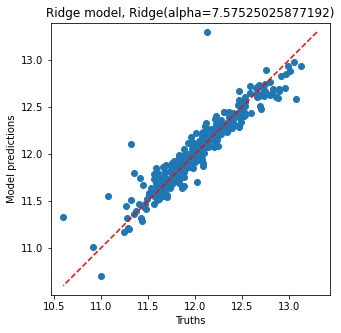

In [9]:
from sklearn import linear_model
from sklearn import metrics
n_alphas = 200
alphas = np.logspace(-5, 5, n_alphas)

score = 'neg_root_mean_squared_error'
param_grid={ 'alpha': alphas }
ridge = linear_model.Ridge()
grid_pred = model_selection.GridSearchCV(
        ridge,
        param_grid,
        cv=cv,
        scoring=score)
grid_pred.fit(X_train_train_std, y_train_train)
print('''neg RMSE d'une regression ridge avec cv (apprentissage): {:.4f}'''.format(grid_pred.best_score_))
y_train_validation_pred_cv = grid_pred.predict(X_train_validation_std)
rmse_cv = np.sqrt(metrics.mean_squared_error(y_train_validation, y_train_validation_pred_cv))
print('''RMSE d'une regression ridge avec cv (généralisation): {:.4f}'''.format(rmse_cv))

fig, ax = plt.subplots(figsize=(5, 5))
plt.scatter(y_train_validation, y_train_validation_pred_cv)
p1 = max(max(y_train_validation_pred_cv), max(y_train_validation))
p2 = min(min(y_train_validation_pred_cv), min(y_train_validation))
plt.plot([p1, p2], [p1, p2], '--',c='red')
ax.axes.axis('equal')
plt.title('Ridge model, {}'.format(grid_pred.best_estimator_))
plt.ylabel('Model predictions')
plt.xlabel('Truths')

In [10]:
print(grid_pred.best_params_)

{'alpha': 7.57525025877192}


In [11]:
r2_cv = metrics.r2_score(y_train_validation, y_train_validation_pred_cv)

In [12]:
print('''r² d'une regression ridge avec cv (généralisation): {:.4f}'''.format(r2_cv))

r² d'une regression ridge avec cv (généralisation): 0.8815


In [13]:
alpha=grid_pred.best_params_['alpha']


In [14]:
ridge = linear_model.Ridge()
ridge.set_params(alpha=alpha)
ridge.fit(X_train_train_std, y_train_train)


Ridge(alpha=7.57525025877192)

In [15]:
ridge_coef=pd.DataFrame(ridge.coef_[0:22],index=data_train.columns[1:23], columns=["param"])

In [16]:
ridge_coef

,param
LotFrontage,0.019584
LotArea,0.039258
MasVnrArea,0.007943
GarageArea,0.042866
WoodDeckSF,0.009800
TotalPorchSF,0.006446
TotalSF,0.138006
AgeRemodAdd,-0.019185
TotalHomeQuality,0.071459
TotalExterQuality,0.006857


In [17]:
ridge_coef=ridge_coef.sort_values(by = 'param',ascending = False)

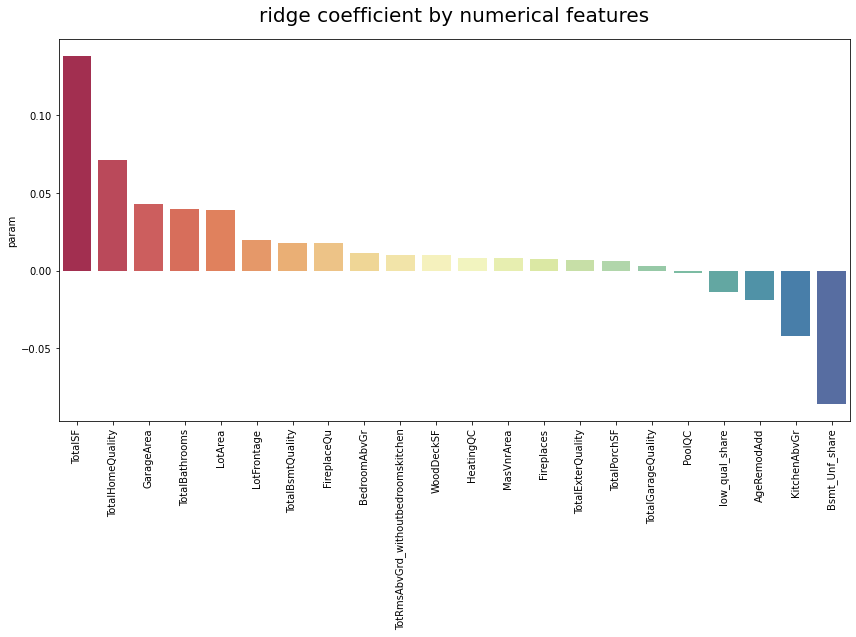

In [18]:
fig,axes=plt.subplots(1,1,figsize=(12,9))
sns.barplot(y=ridge_coef['param'],x=ridge_coef.index,palette='Spectral')
plt.title('ridge coefficient by numerical features',size=20,color='black',y=1.03)
plt.xticks(rotation=90)
for p in axes.patches:
            value = p.get_height()
            if value <=.5:
                continue
            x = p.get_x() + p.get_width()-.9
            y = p.get_y() + p.get_height()+(.02*value)
            axes.text(x, y, str(value)[1:5], ha="left",fontsize=12,color='#000000')
plt.tight_layout();

In [19]:
ridge_coef.to_csv(os.path.join(path_to_data,'ridge_coef_regression_prediction.csv'),index = True, header=True)

In [20]:
y_test = grid_pred.predict(X_test_std)

In [21]:
print(y_test)

[11.71225926 11.9658709  12.13468494 ... 12.12791944 11.72264339
 12.27436418]


In [22]:
data_y_predict=pd.DataFrame(y_test,index=data_test.index,columns=["log_SalePrice"])

In [23]:
data_y_predict

,log_SalePrice
1460,11.712259
1461,11.965871
1462,12.134685
1463,12.203995
1464,12.116884
...,...
2914,11.329487
2915,11.306028
2916,12.127919
2917,11.722643


In [24]:
data_y_predict['SalePrice']=np.expm1(data_y_predict['log_SalePrice'])

In [25]:
data_y_predict['id']=data_y_predict.index

In [26]:
data_y_predict['id']=data_y_predict['id']+1

In [27]:
data_y_predict=data_y_predict[['id','SalePrice']]

In [28]:
data_y_predict

,id,SalePrice
1460,1461,122057.932659
1461,1462,157292.835436
1462,1463,186219.166057
1463,1464,199583.931827
1464,1465,182933.536380
...,...,...
2914,2915,83239.319396
2915,2916,81309.339232
2916,2917,184963.545063
2917,2918,123332.011903


In [29]:
data_y_predict.to_csv(os.path.join(path_to_data,'ridge_regression_prediction.csv'),index = False, header=True)